In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 20.4 MB/s eta 0:00:0000:01


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [17]:
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100%|██████████████████████████████████████| 49.2k/49.2k [00:00<00:00, 29.8MB/s]
image 1/1 /kaggle/working/zidane.jpg: 384x640 2 persons, 1 tie, 87.2ms
Speed: 10.3ms preprocess, 87.2ms inference, 253.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


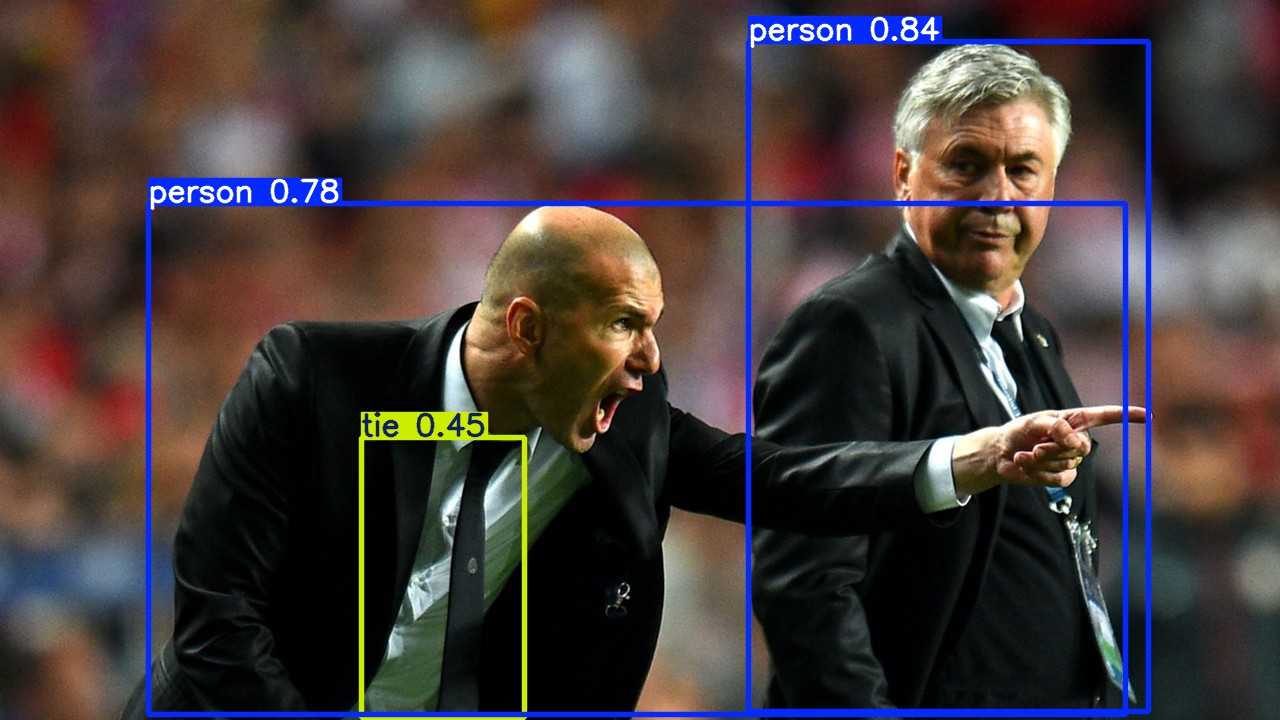

In [20]:
from IPython.display import Image, display
image_path = '/kaggle/working/runs/detect/predict/zidane.jpg'

display(Image(filename=image_path))


In [31]:
!yolo predict model=yolo11n.pt source='/kaggle/input/fire-dataset-in-yolo-format/Fire_data/images/test/fire.14.png'

Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /kaggle/input/fire-dataset-in-yolo-format/Fire_data/images/test/fire.14.png: 384x640 1 person, 1 backpack, 53.9ms
Speed: 5.9ms preprocess, 53.9ms inference, 180.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


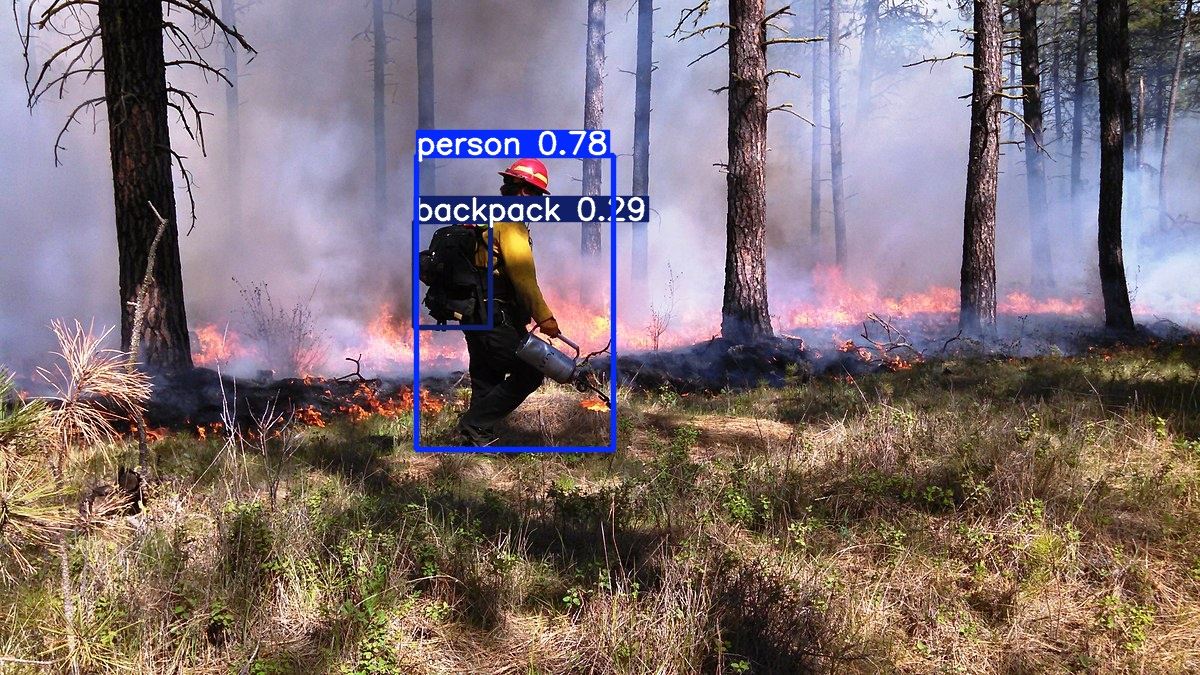

In [36]:
image_path = '/kaggle/working/runs/detect/predict3/fire.14.jpg'
display(Image(filename=image_path))

In [37]:
model = YOLO("yolo11n.pt")

In [ ]:
# TensorBoard: Start with 'tensorboard --logdir runs/detect/train3', view at http://localhost:6006/

In [ ]:
data_path = "/kaggle/input/firesmoke-detection-yolo-v9/Fire and Smoke Dataset/data.yaml"

results = model.train(data=data_path, epochs=10,patience=5
                      , imgsz=640, time=1)

Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/firesmoke-detection-yolo-v9/Fire and Smoke Dataset/data.yaml, epochs=10, time=1, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

train: Scanning /kaggle/input/firesmoke-detection-yolo-v9/Fire and Smoke Dataset/train/labels... 35695 images, 9046 backgrounds, 0 corrupt: 100%|██████████| 35695/35695 [01:23<00:00, 428.62it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/firesmoke-detection-yolo-v9/Fire and Smoke Dataset/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2916, len(boxes) = 36668. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
train: 61.3GB RAM required to cache images with 50% safety margin but only 28.6/31.4GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/firesmoke-detection-yolo-v9/Fire and Smoke Dataset/valid/labels... 4892 images, 855 backgrounds, 0 corrupt: 100%|██████████| 4892/4892 [00:11<00:00, 418.98it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/firesmoke-detection-yolo-v9/Fire and Smoke Dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 291, len(boxes) = 6085. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (5.5GB RAM): 100%|██████████| 4892/4892 [00:07<00:00, 658.74it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 hours...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.68G      1.864      3.131      1.997         20        640: 100%|██████████| 2231/2231 [08:12<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:26<00:00,  5.79it/s]


                   all       4892       6085       0.51      0.304      0.303      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/7      2.67G      1.849      2.464      2.006         11        640: 100%|██████████| 2231/2231 [07:59<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:26<00:00,  5.71it/s]


                   all       4892       6085      0.529      0.361      0.379      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/7      2.66G      1.776      2.246      1.931         12        640: 100%|██████████| 2231/2231 [07:53<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:25<00:00,  5.91it/s]


                   all       4892       6085      0.577      0.389      0.434      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      2.66G       1.71      2.063      1.862         14        640: 100%|██████████| 2231/2231 [07:51<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:26<00:00,  5.70it/s]


                   all       4892       6085      0.604      0.453      0.511      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      2.65G      1.638       1.88      1.795         14        640: 100%|██████████| 2231/2231 [07:48<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:25<00:00,  6.02it/s]


                   all       4892       6085      0.638      0.484       0.54      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      2.65G      1.568      1.732      1.732         13        640: 100%|██████████| 2231/2231 [07:47<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:25<00:00,  6.02it/s]


                   all       4892       6085      0.666      0.514      0.584      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      2.67G      1.515       1.59      1.688         19        640:  15%|█▍        | 326/2231 [01:08<06:33,  4.84it/s]